<a href="https://colab.research.google.com/github/satyamyeola/Optimal-Portfolio-Allocation/blob/main/Assignment2_25b2506.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## WEEK-2 Assignment
Fill the missing places wherever TO DO is mentioned and also understnad what has been done properly


**Also give explanation about each graph and what all you understood about it by adding a text cell below the respective graph**

Do not use Chatgpt . It is a simple assignment. Make a copy of this colab notebook and do your changes and submit it as `Assignment2_yourrollno.ipnyb`


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

TICKERS = ["RELIANCE.NS", "TCS.NS", "HDFCBANK.NS"] #you can choose assets of your own wish

df = yf.download(TICKERS, period="3y")
prices = df.xs("Close", axis=1, level=0)

prices = prices.fillna(method="ffill").dropna()
prices.head()


/tmp/ipython-input-4023598879.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(TICKERS, period="3y")
[*********************100%***********************]  3 of 3 completed
/tmp/ipython-input-4023598879.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  prices = prices.fillna(method="ffill").dropna()


Ticker,HDFCBANK.NS,RELIANCE.NS,TCS.NS
Date,,,
2022-12-26,784.038757,1152.220215,2978.280762
2022-12-27,784.832703,1161.646973,2984.323730
2022-12-28,784.207275,1161.532837,2982.126709
2022-12-29,789.740662,1161.007812,2992.792725
2022-12-30,783.413269,1162.788086,2981.759521


here i learnt to fill and remove some missing data.

In [ ]:
log_returns = log_returns = np.log(prices / prices.shift(1))         #TO DO : calculate log return
log_returns.head()


Ticker,HDFCBANK.NS,RELIANCE.NS,TCS.NS
Date,,,
2022-12-26,NaN,NaN,NaN
2022-12-27,0.001012,0.008148,0.002027
2022-12-28,-0.000797,-0.000098,-0.000736
2022-12-29,0.007031,-0.000452,0.003570
2022-12-30,-0.008044,0.001532,-0.003693


After multiplying by 100, from this grid i come to know the percentage wise growth(if sign is positive) or loss(if sign is negative) of each company on the daily basis.

In [ ]:
TRADING_DAYS = 252
mu =  log_returns.mean() * TRADING_DAYS                     #TO DO : Calculate Expected return (annual)
cov_matrix =  log_returns.cov() * TRADING_DAYS             #TO DO : Calculate Covariance matrix

mu, cov_matrix


(Ticker
 HDFCBANK.NS    0.081787
 RELIANCE.NS    0.102650
 TCS.NS         0.036837
 dtype: float64,
 Ticker       HDFCBANK.NS  RELIANCE.NS    TCS.NS
 Ticker                                         
 HDFCBANK.NS     0.034408     0.013487  0.005187
 RELIANCE.NS     0.013487     0.039911  0.010919
 TCS.NS          0.005187     0.010919  0.038537)

For the expected annual return we take avergae over the log returns of the last 3 year's data and multiply it by 252 .
The covariance matrix tells us the dependence of the two companies on each other.

In [ ]:
# step controls how finely we explore the portfolio weight space.
# step = 0.02 means weights change in increments of 2%:
# 0.00, 0.02, 0.04, ..., 1.00
# Smaller step  -> more portfolios -> higher accuracy -> slower computation
# Larger step  -> fewer portfolios -> faster but coarser approximation
step = 0.02  # You can consider some other step sizes too
weights = []   # This list will store all VALID portfolios. Each portfolio is a vector: [w1, w2, w3]


# Loop over possible values of weight for Asset 1
for w1 in np.arange(0, 1 + step, step):
    # For each w1, loop over possible values of weight for Asset 2
    for w2 in np.arange(0, 1 + step, step):
        w3 =1 - w1 - w2                         # TO DO : What should be w3 in terms of w1 and w2 (Budget constraint)
        if True:                       # TO DO : what should be the condition for the if statement so that it satisfies long-only constraint Change the tru to ypur condition
            weights.append([w1, w2, w3])

weights = np.array(weights)
#TO DO : print the no. of feasible portfolios
print(f"Number of feasible portfolios: {len(weights)}")

Number of feasible portfolios: 2601


to assure complete money distribution w1+w2+w3=1 and to avoid w1+w2>1 there is a ifloop. Finally it gives us the number of feasible combination of the portfolio.

In [ ]:
# Lists to store portfolio returns and volatility
portfolio_returns = []
portfolio_volatility = []


# Loop over every feasible portfolio weight vector
for w in weights:
    ret =   np.dot(w, mu)                      # TO DO : Calculate return of Portfolio
    var =  np.dot(w.T, np.dot(cov_matrix, w))                       # TO DO : Calculate Volatility

    portfolio_returns.append(ret)
    portfolio_volatility.append(np.sqrt(var))

portfolio_df = pd.DataFrame(weights, columns=["w1", "w2", "w3"])
portfolio_df["Return"] = portfolio_returns
portfolio_df["Volatility"] = portfolio_volatility

portfolio_df.head()


,w1,w2,w3,Return,Volatility
0,0.0,0.00,1.00,0.036837,0.196310
1,0.0,0.02,0.98,0.038153,0.193534
2,0.0,0.04,0.96,0.039469,0.190836
3,0.0,0.06,0.94,0.040785,0.188221
4,0.0,0.08,0.92,0.042102,0.185690


This tells us the significance of diversification. From above grid we can see that when we diversify our investment the return is increasing and the volatility(risk) is also decreasing.

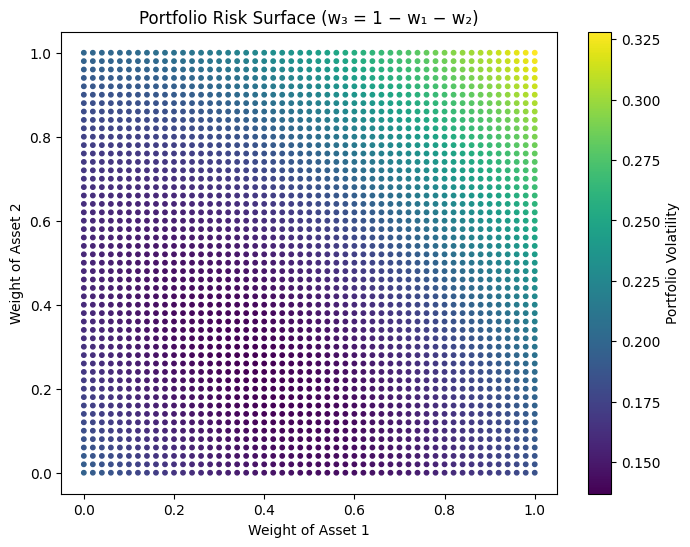

In [ ]:
#Visualization for Risk Surface
plt.figure(figsize=(8,6))
sc = plt.scatter(
    portfolio_df["w1"],
    portfolio_df["w2"],
    c=portfolio_df["Volatility"],
    cmap="viridis",
    s=10
)

plt.colorbar(sc, label="Portfolio Volatility")
plt.xlabel("Weight of Asset 1")
plt.ylabel("Weight of Asset 2")
plt.title("Portfolio Risk Surface (w₃ = 1 − w₁ − w₂)")
plt.show()


this plot tells us how to invest our money in what proportion for maximum return at minimum risk.

In [ ]:
min_var_idx = portfolio_df["Volatility"].idxmin()                          # TO DO : Discover the Minimum Variance Portfolio
min_var_portfolio = portfolio_df.iloc[min_var_idx]                    #To Do : Fill this

min_var_portfolio


,1032
w1,0.400000
w2,0.240000
w3,0.360000
Return,0.070612
Volatility,0.136999


this helped to get that excact combination where the volatility is minimum and the return is maximum.

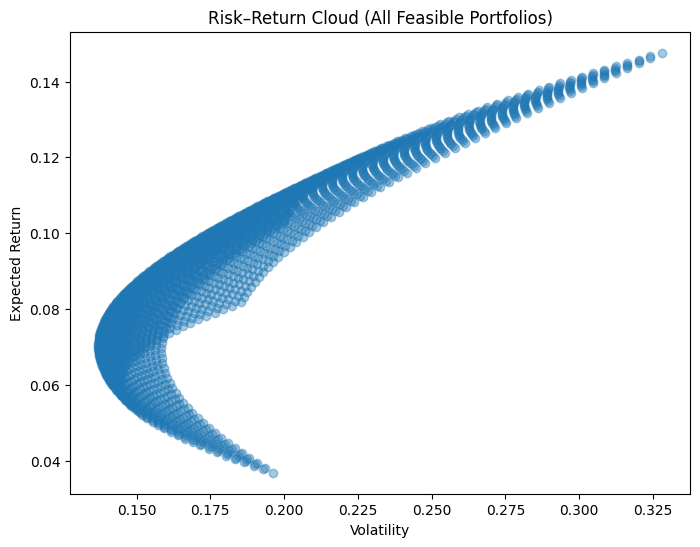

In [ ]:
# Risk-Return for all Portfolios (Visualization)
plt.figure(figsize=(8,6))
plt.scatter(
    portfolio_df["Volatility"],
    portfolio_df["Return"],
    alpha=0.4
)

plt.xlabel("Volatility")
plt.ylabel("Expected Return")
plt.title("Risk–Return Cloud (All Feasible Portfolios)")
plt.show()

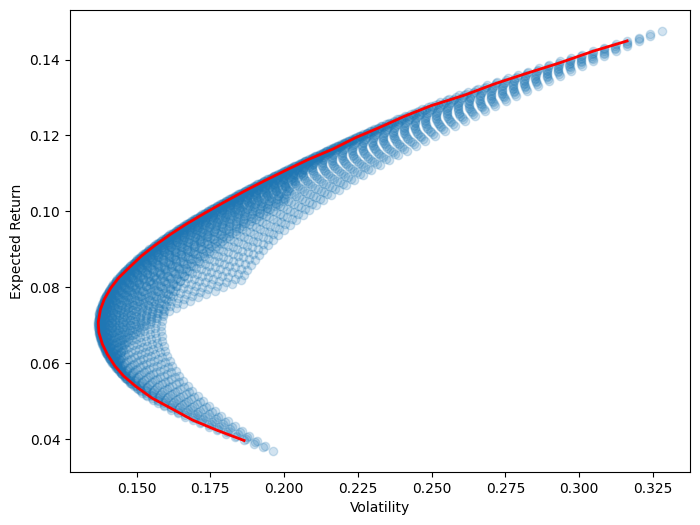

In [ ]:
# To DO: Study about the red line what is it called and what it signifies
bins = np.linspace(
    portfolio_df["Return"].min(),
    portfolio_df["Return"].max(),
    40
)

frontier_risk = []
frontier_return = []

for i in range(len(bins)-1):
    mask = (portfolio_df["Return"] >= bins[i]) & (portfolio_df["Return"] < bins[i+1])
    subset = portfolio_df[mask]

    if len(subset) > 0:
        min_row = subset.loc[subset["Volatility"].idxmin()]
        frontier_risk.append(min_row["Volatility"])
        frontier_return.append(min_row["Return"])

plt.figure(figsize=(8,6))
plt.scatter(portfolio_df["Volatility"], portfolio_df["Return"], alpha=0.2)
plt.plot(frontier_risk, frontier_return, color="red", linewidth=2)
plt.xlabel("Volatility")
plt.ylabel("Expected Return")
plt.show()


In [ ]:
# Controlled stress test on diversification
# Increase covariance to simulate higher correlation. This mimics market stress where assets move together
stressed_cov =  cov_matrix.copy()               # TO DO : Create a copy of the original covariance matrix

for i in range(len(stressed_cov)):
    for j in range(len(stressed_cov)):
        if i != j:
            stressed_cov.iloc[i, j] *= 2    # Can change the factor from 2 to any other no. too. Try chaging to diff values


In [ ]:
# List to store portfolio volatility after correlation stress
stressed_volatility = []

for w in weights:
    var =  np.dot(w.T, np.dot(stressed_cov, w))                          #TO DO :  Calculate Portfolio variance under stressed covariance
    stressed_volatility.append(np.sqrt(var))

portfolio_df["Stressed Volatility"] = stressed_volatility


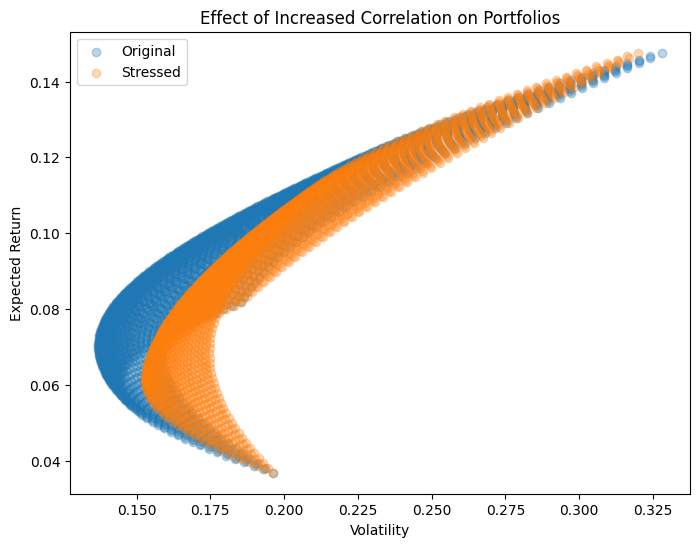

In [ ]:
#TO DO : Study this graph. It represents two conditions one with normal corr and one with stressed corr
plt.figure(figsize=(8,6))

plt.scatter(
    portfolio_df["Volatility"],
    portfolio_df["Return"],
    alpha=0.3,
    label="Original"
)

plt.scatter(
    portfolio_df["Stressed Volatility"],
    portfolio_df["Return"],
    alpha=0.3,
    label="Stressed"
)

plt.xlabel("Volatility")
plt.ylabel("Expected Return")
plt.title("Effect of Increased Correlation on Portfolios")
plt.legend()
plt.show()


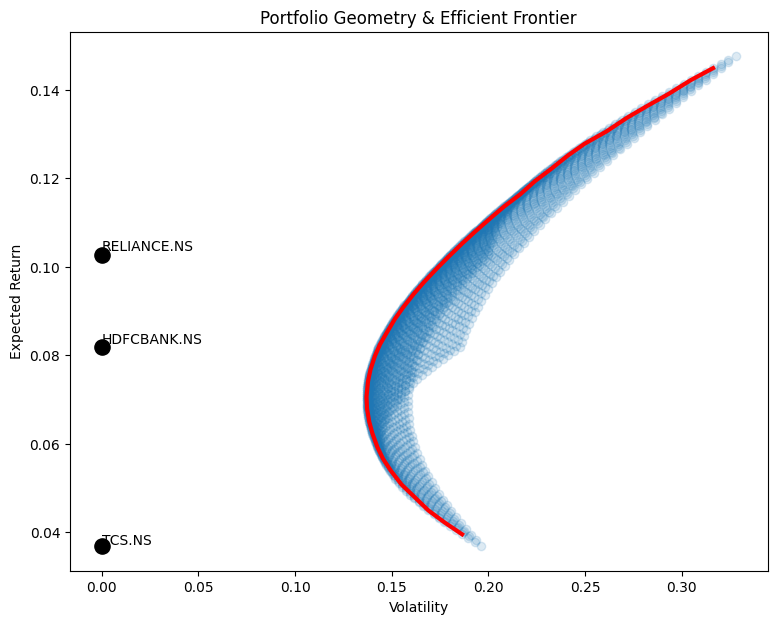

In [ ]:
asset_vol = pd.Series(asset_vol, index=mu.index)                      # TO DO : Compute individual asset volatility (annualized)

#Visualization
#TO DO : study this graph
plt.figure(figsize=(9,7))

# Portfolios
plt.scatter(portfolio_df["Volatility"], portfolio_df["Return"], alpha=0.15)

# Efficient Frontier
plt.plot(frontier_risk, frontier_return, color="red", linewidth=3)

# Assets
plt.scatter(asset_vol, mu, s=120, color="black")
for asset in mu.index:
    plt.text(asset_vol[asset]*1.01, mu[asset]*1.01, asset)

plt.xlabel("Volatility")
plt.ylabel("Expected Return")
plt.title("Portfolio Geometry & Efficient Frontier")
plt.show()
